# Students Data Analysis

This Project was made to deliver insight on student's abilities and how they approach and answer certain tests, also the data provided from this study is meant to be used to calibrate an system for immitating students' behaviours to test an Adaptive learning lms using Computerized Adaptive Testing Algorithms

## Importing Libraries & Files

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score,confusion_matrix
import math
from math import exp
import plotly.express as px

In [3]:
students = pd.read_csv('./Datasets/Final_Scores_EST_To_Upload.csv')

In [4]:
item_bank = pd.read_csv('./Datasets/EST II Biology - March 2022 Working Copy.csv')

## Students Ability Measurements

### EDA

    Deleting Unnecessary Columns

In [5]:
students = students.drop(columns=['Student ID', 'Passport', 'Nationality', 'Other Nationality'])
students.head()

,Admission ID,English Name,F,Grade,EST I total,EST I - Literacy,EST I - Mathematics,EST II - Math 1,EST II - Biology,EST II - Math 2,EST I - Essay
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN


    Renaming Columns

In [6]:
students.columns = ['id', 'name', 'gender', 'grade', 'total_marks', 'literacy', 'mathematics','math1', 'biology', 'math2', 'essay']

    Deleting non existant total grades

In [7]:
students = students[students['total_marks'].notna()]

    Transforming Grades to Percentages

In [8]:
def transform_to_percentage():
    students['percentage_total_marks'] = students['total_marks'].apply(lambda x: (x*100) / 1580)

transform_to_percentage()

### Classifying students based on abilities

In [9]:
def classify_ability(total_mark):
    
    if total_mark <= 45:
        return str('level 1')

    if 45 < total_mark < 60:
        return str('level 2')
    
    if 60<= total_mark < 70:
        return str('level 3')

    if 70 <= total_mark < 80:
        return str('level 4')

    if 80 <= total_mark < 85:
        return str('level 5')

    if 85 <= total_mark < 90:
        return str('level 6')

    if 90 <= total_mark < 95:
        return str('level 7')

    if 95 <= total_mark < 100:
        return str('level 8')

    Initializing new abilities column

In [10]:
def probability_measurement():
   students['ability'] = students['percentage_total_marks'].apply(lambda x: classify_ability(x))

probability_measurement()

students.head()

,id,name,gender,grade,total_marks,literacy,mathematics,math1,biology,math2,essay,percentage_total_marks,ability
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN,66.455696,level 3
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN,74.050633,level 4
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN,77.848101,level 4
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN,83.544304,level 5
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN,65.822785,level 3


    Calculacting values count for each ability

In [11]:
students_count_per_ability = students['ability'].value_counts()

In [12]:
students_count_per_ability

level 3    1613
level 2    1342
level 4     807
level 5     210
level 6      85
level 7      26
level 1       3
level 8       2
Name: ability, dtype: int64

    Calculating each ability value appearance in percentages

In [13]:
def ability_percentage(students_count_per_ability):
    percentages = []

    for index in students_count_per_ability.index.sort_values(ascending=True):
        percentages.append(students_count_per_ability[index] * 100 / students_count_per_ability.sum())

    return percentages

ability_percentage(students_count_per_ability)

[0.07338551859099804,
 32.827788649706456,
 39.456947162426616,
 19.740704500978474,
 5.136986301369863,
 2.079256360078278,
 0.6360078277886497,
 0.04892367906066536]

### Visualization

    Printing students' marks plot to number of students

<AxesSubplot:xlabel='percentage_total_marks', ylabel='Count'>

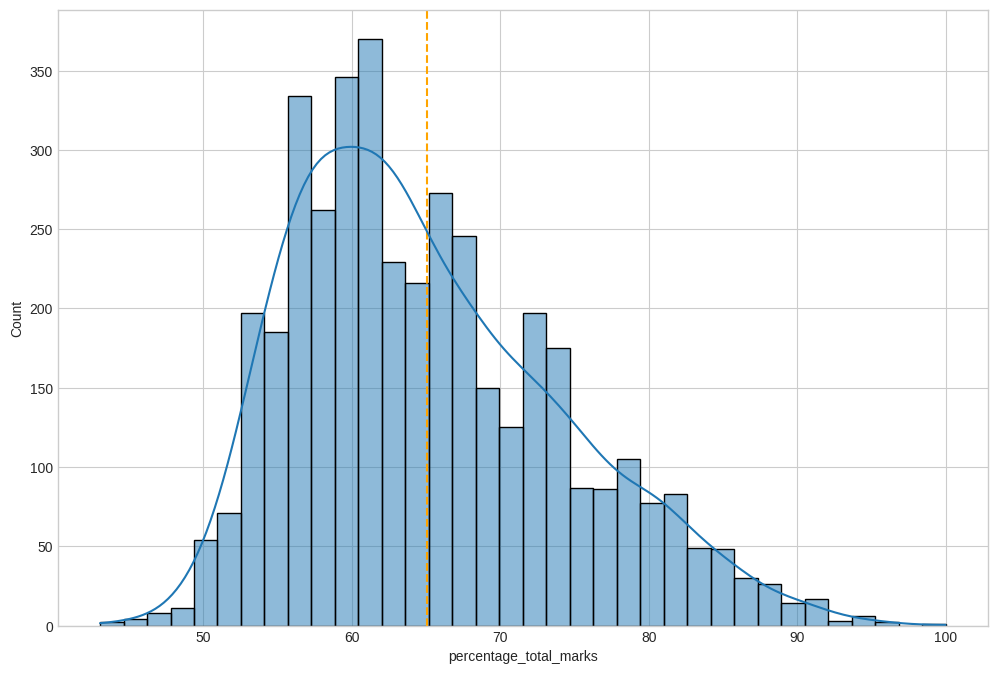

In [14]:
percentage_total_marks = students['percentage_total_marks'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = percentage_total_marks['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = students['percentage_total_marks'] ,kde = True)

    Abilities distribution percentages to students

<AxesSubplot:>

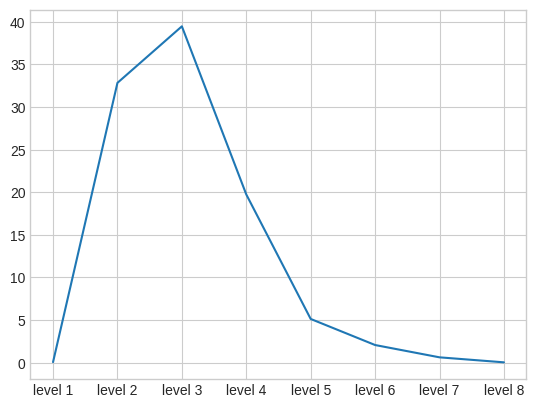

In [15]:
sns.lineplot(x=students['ability'].value_counts().index.sort_values(ascending=True), y=ability_percentage(students_count_per_ability))

## Item Bank Analysis

In [16]:
item_bank.head()

,FIRSTNAME,SURNAME,USERNAME,STUDENT_TOTAL_SCORE,ASSESSMENT_MAX_SCORE,ASSESSMENT_STARTED,ASSESSMENT_ENDED,ITEM_1_SCORE,ITEM_1_MAX_SCORE,ITEM_2_SCORE,...,ITEM_76_SCORE,ITEM_76_MAX_SCORE,ITEM_77_SCORE,ITEM_77_MAX_SCORE,ITEM_78_SCORE,ITEM_78_MAX_SCORE,ITEM_79_SCORE,ITEM_79_MAX_SCORE,ITEM_80_SCORE,ITEM_80_MAX_SCORE
0,Begad,Yasser Abdelrehim Hassan,dupes@live.com,37,80,2022-03-26T08:02:38Z,2022-03-26T09:04:47Z,0.0,1,1.0,...,0.0,1,0.0,1,1.0,1,1.0,1,0.0,1
1,Sofian,Mohamed Fahmi Mohamed Mohamed Fayed,sofiianfayed@gmail.com,20,80,2022-03-26T08:04:04Z,2022-03-26T09:04:46Z,1.0,1,0.0,...,1.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,Youssef,Walid Ragab Mohamed Ragab,walidbhit@hotmail.com,34,80,2022-03-26T08:07:18Z,2022-03-26T09:08:40Z,1.0,1,1.0,...,1.0,1,0.0,1,0.0,1,0.0,1,1.0,1
3,Youssef,Sherif Youssef Owida Hassan,youssefowida04@gmail.com,33,80,2022-03-26T08:12:27Z,2022-03-26T09:13:28Z,0.0,1,1.0,...,1.0,1,0.0,1,1.0,1,0.0,1,1.0,1
4,Rouaa,Hamdi Abdalla Ali,hamdyroaa1@gmail.com,28,80,2022-03-26T08:01:58Z,2022-03-26T09:04:23Z,1.0,1,0.0,...,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1


### EDA

    Filtering Max Score Columns since scores are always 0s and 1s

In [17]:
item_bank = item_bank[item_bank.columns.drop(list(item_bank.filter(regex=r'ITEM_[1-9][0-9]?_MAX_SCORE')))]

    Cleaning Time related columns

In [18]:
item_bank['ASSESSMENT_STARTED'] = item_bank["ASSESSMENT_STARTED"].str[11:]
item_bank['ASSESSMENT_ENDED'] = item_bank["ASSESSMENT_ENDED"].str[11:]
item_bank["ASSESSMENT_STARTED"] = item_bank["ASSESSMENT_STARTED"].str.replace("Z","")
item_bank["ASSESSMENT_ENDED"] = item_bank["ASSESSMENT_ENDED"].str.replace("Z","")

    All Columns names to be lower cases

In [19]:
item_bank.columns = map(str.lower, item_bank.columns)
item_bank = item_bank.sort_values(by = 'student_total_score')
item_bank = item_bank.drop(columns=['assessment_max_score'])

    Transform Grading to Percentage Values

In [20]:
def transform_to_percentage():
    item_bank['student_total_score_percentage'] = item_bank['student_total_score'].apply(lambda x: (x*100) / 75)

transform_to_percentage()

    Assigning Abilities

In [21]:
def assign_student_ability(student_total_score_percentage: int):

    
    if student_total_score_percentage <= 20:
        return -5
    
    elif 20 < student_total_score_percentage < 40:
        return -2

    elif 40 <= student_total_score_percentage < 60:
        return 0
    
    elif 60 <= student_total_score_percentage < 80:
        return 2    

    else:
        return 5

item_bank['student_ability'] = item_bank['student_total_score_percentage'].apply(lambda student_total_score_percentage: assign_student_ability(student_total_score_percentage))


### Measuring an Item's characteristic curve (ICC)

    Calculating Difficulty for each Item by calculating how each question was handled with students and calculating the mean

In [22]:
items_mean_score_list = []
items_mean_name_list = []

def check_items_mean(item):
    item_score = item_bank[item].describe()
    x = item_score['mean']
    items_mean_name_list.append(item)
    items_mean_score_list.append(x)
    # print (item ,x)

for x in range(1, 81):
    item = 'item_{}_score'.format(x)
    check_items_mean(item)

print(items_mean_score_list, items_mean_name_list)

[0.5216201423097975, 0.44986301369863013, 0.43852908891328213, 0.3351618211738892, 0.7016967706622879, 0.2314004376367615, 0.23958333333333334, 0.2591982427237781, 0.535675082327113, 0.45673603504928806, 0.34318555008210183, 0.43969298245614036, 0.31599123767798465, 0.30010952902519167, 0.6363636363636364, 0.2839168490153173, 0.5, 0.4103126714207351, 0.3033461327482172, 0.40777230432402845, 0.2804610318331504, 0.2602965403624382, 0.23940561364887178, 0.11281489594742607, 0.7396061269146609, 0.6284931506849315, 0.2501368363437329, 0.3167123287671233, 0.3322386425834702, 0.3930921052631579, 0.4723590585659551, 0.36383561643835616, 0.3925438596491228, 0.45668859649122806, 0.36308871851040525, 0.3183561643835616, 0.22252747252747251, 0.2678375411635565, 0.2149122807017544, 0.4731359649122807, 0.29489291598023065, 0.1630971993410214, 0.17233809001097694, 0.18221734357848518, 0.2630422844590884, 0.2508232711306257, 0.2068019747668678, 0.42073505211190343, 0.33881578947368424, 0.2906593406593

    Initializing new Quesitons Datafram to hold Difficulty Information for further functionalities 

In [23]:
questions_df = pd.DataFrame(list(zip(items_mean_name_list, items_mean_score_list)),
               columns =['Item Name', 'Difficulty'])

questions_df.head()

,Item Name,Difficulty
0,item_1_score,0.521620
1,item_2_score,0.449863
2,item_3_score,0.438529
3,item_4_score,0.335162
4,item_5_score,0.701697


    Initializing new Students Dataframe to assign new items columns to hold probability measurements rather than data about how the students answered the questions

In [24]:
students_grades_df = item_bank.copy(deep = True)
students_grades_df = students_grades_df[['firstname', 'surname', 'student_total_score_percentage']]
students_grades_df.head()

,firstname,surname,student_total_score_percentage
1082,Nanci,Ahmed Mohamed Sameh,9.333333
591,Mohamed,Fady Abdou El Basyouni,9.333333
1499,Bavly,Awad Faragallah Rizkalla,10.666667
363,Malek,Sobhe Abdul Diam,12.000000
326,Hady,Wadie Samy,12.000000


In [25]:
# def add_top_column(df, top_col, inplace=False):
#     if not inplace:
#         df = df.copy()
    
#     df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
#     return df

# new_df = add_top_column(students_grades_df, "new column")
# new_df.head()


    Filling new Students Dataframe with empty columns from questions list

In [26]:
students_grades_df = pd.concat([students_grades_df, pd.DataFrame(columns=items_mean_name_list)])

    Measuring the probability of answering questions for each student with each question regarding each student's ability and each question's difficulty

In [27]:
def prob_measurement(x, y):
    expression = (x/100) - y
    probability = (exp(expression))/(1+exp(expression))
    probability = probability -0.348
    probability = probability/0.348
    return probability
    
def question_answering_probability(students_grades_df, questions_df, column_name):
    
    column_value = float(questions_df.loc[questions_df['Item Name'] == column_name]['Difficulty'].values)
    students_grades_df[column_name] = students_grades_df['student_total_score_percentage'].apply(lambda x: prob_measurement(x, column_value))

question_answering_probability(students_grades_df, questions_df, 'item_1_score')

for x in range(1, 81):
    item = 'item_{}_score'.format(x)
    question_answering_probability(students_grades_df, questions_df, item)

# students_grades_df.head()


In [28]:
# fig = px.line(students_grades_df, x="student_total_score_percentage", y="item_1_score")
# fig.show()

In [29]:
def student_abilities(student_total_score_percentage):
    
    if student_total_score_percentage <= 12.5:
        return 0.125
    
    elif 12.5 < student_total_score_percentage < 25:
        return 0.25

    elif 25 <= student_total_score_percentage < 37.5:
        return 0.375
    
    elif 37.5 <= student_total_score_percentage < 50:
        return 0.5

    elif 50 <= student_total_score_percentage < 62.5:
        return 0.625   

    elif 62.5 <= student_total_score_percentage < 75:
            return 0.75

    elif 75 <= student_total_score_percentage < 87.5:
        return 0.875

    else:
        return 1
    
students_grades_df['student_ability'] = students_grades_df['student_total_score_percentage'].apply(lambda student_total_score_percentage: student_abilities(student_total_score_percentage))


In [30]:
students_grades_df.tail()

,firstname,surname,student_total_score_percentage,item_1_score,item_2_score,item_3_score,item_4_score,item_5_score,item_6_score,item_7_score,...,item_72_score,item_73_score,item_74_score,item_75_score,item_76_score,item_77_score,item_78_score,item_79_score,item_80_score,student_ability
65,Zeyad,Ashraf Gadelkarim Abuzied Mohamed,89.333333,0.700784,0.750246,0.757991,0.827671,0.574032,0.895674,0.890388,...,0.879366,0.828278,0.938779,0.883640,0.814132,0.934272,0.843108,0.871982,0.856142,1.0
848,Mohamed,Raafat Mohyeldeen Abdelrahman,89.333333,0.700784,0.750246,0.757991,0.827671,0.574032,0.895674,0.890388,...,0.879366,0.828278,0.938779,0.883640,0.814132,0.934272,0.843108,0.871982,0.856142,1.0
426,Marwan,Amr Mohamed Fawzi,90.666667,0.710028,0.759355,0.767077,0.836524,0.583517,0.904257,0.898994,...,0.888018,0.837129,0.947168,0.892274,0.823034,0.942682,0.851903,0.880664,0.864888,1.0
1182,Pierre,Ehab Ramzy Ghattas,92.000000,0.719248,0.768437,0.776135,0.845345,0.592989,0.912803,0.907562,...,0.896634,0.845948,0.955518,0.900871,0.831905,0.951054,0.860665,0.889310,0.873598,1.0
25,Yahya,Galal Abdelfattah Mohamed Elashry,92.000000,0.719248,0.768437,0.776135,0.845345,0.592989,0.912803,0.907562,...,0.896634,0.845948,0.955518,0.900871,0.831905,0.951054,0.860665,0.889310,0.873598,1.0


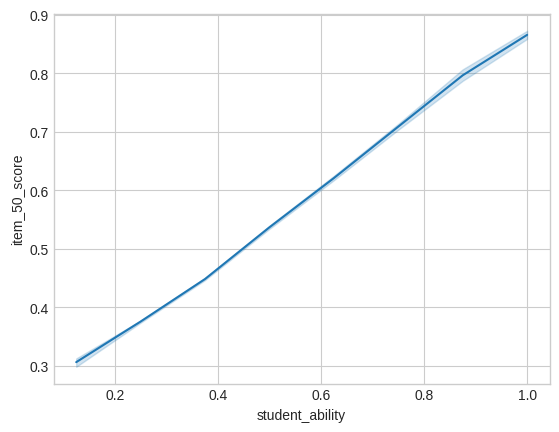

In [31]:
fig = sns.lineplot(data=students_grades_df, x='student_ability', y='item_50_score')

### Visualizating Result

    Each question's mean visualization

In [ ]:
item_3_score = item_bank['item_3_score'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = item_3_score['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = item_bank['item_3_score'] ,kde = True)

print(item_3_score['mean'])

In [ ]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_3_score',hue='student_total_score')
plt.legend('', ncol=6, loc='upper left')

In [ ]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_24_score',hue='student_total_score')
plt.legend('', ncol=6, loc='upper left')

In [ ]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=item_bank, x='student_total_score', y='item_3_score')

In [ ]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=item_bank, x='student_total_score', y='item_3_score')

In [ ]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=item_bank, x='student_total_score', y='item_24_score')